

---
**Importing needed package**
---




---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


---
**Load The Dataset** 
---



---






In [2]:
df_country =  pd.read_csv('drive/My Drive/Bootcamp Data Science Python/Final Project/Data_Negara_HELP.csv')
df_country

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310




---
**Multivariate Analisys**
---





---








**Pairplot**

---



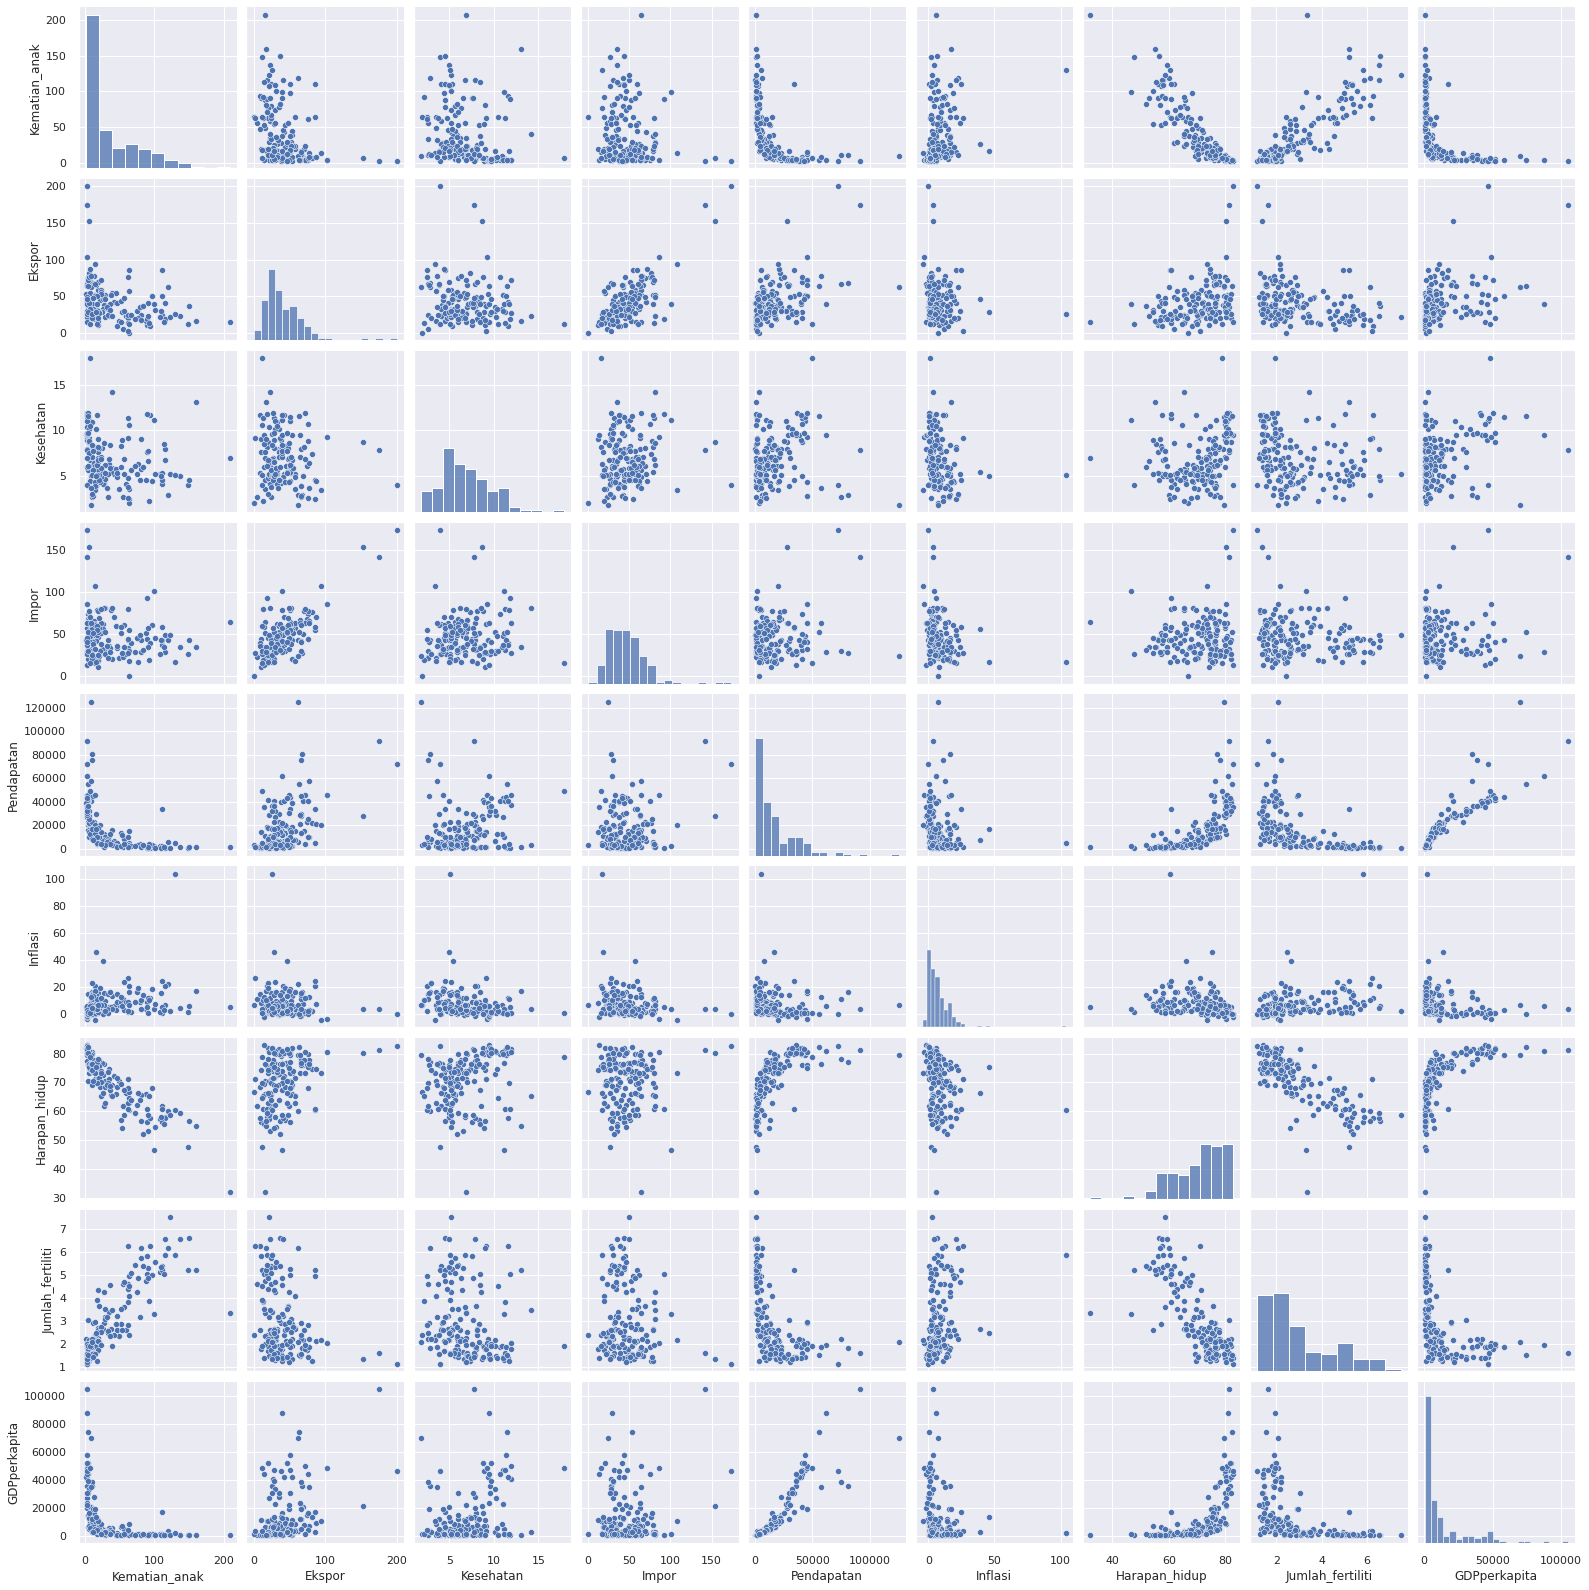

In [115]:
sns.pairplot(df_country)



---
**Heatmap Correlation**


---




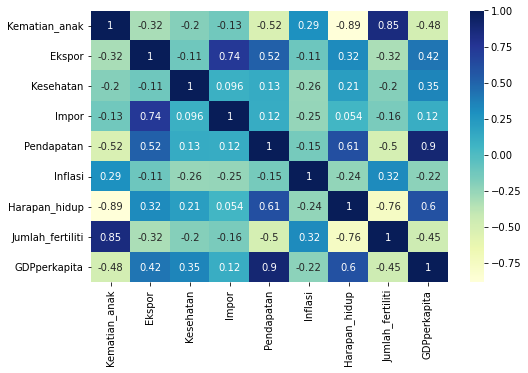

In [3]:
plt.subplots(figsize=(8,5))
dataplot = sns.heatmap(df_country.corr(), cmap="YlGnBu", annot=True)



---
**Selecting Feature**
---



---




In [51]:
df_country_ft = df_country[['GDPperkapita','Kematian_anak']].copy()
df_country_ft.head()

,GDPperkapita,Kematian_anak
0,553,90.2
1,4090,16.6
2,4460,27.3
3,3530,119.0
4,12200,10.3




---
**Checking Missing Values**
---



---



In [38]:
df_country_ft.isnull().sum()

GDPperkapita     0
Kematian_anak    0
dtype: int64



---
**Plotting Missing Values Heatmap**

---




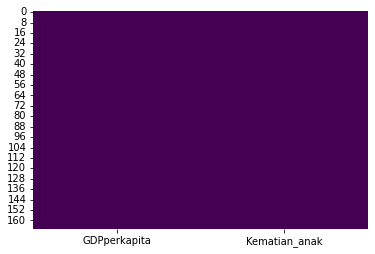

In [39]:
sns.heatmap(df_country_ft.isnull(),cbar=False,cmap='viridis')



---
**Checking Outliers**
---



---



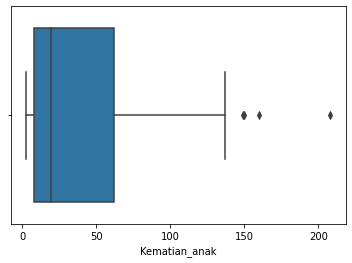

In [40]:
# Boxplot untuk Kematian_anak
sns.boxplot(data=df_country_ft, x=df_country_ft['Kematian_anak'])

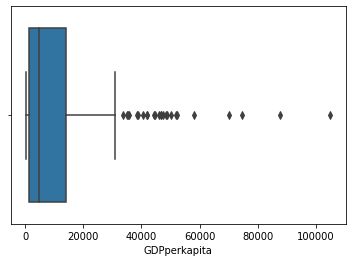

In [41]:
# Boxplot untuk GDPperkapita
sns.boxplot(data=df_country_ft, x=df_country_ft['GDPperkapita'])



---


**Plotting Histogram to check feature distribution**


---



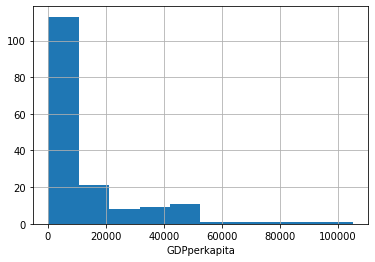

In [55]:
plt.hist(df_country_ft['GDPperkapita'])
plt.xlabel('GDPperkapita')
plt.grid(visible=True)
plt.show()


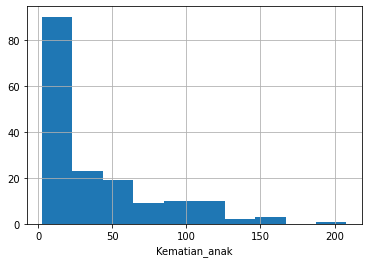

In [56]:
plt.hist(df_country_ft['Kematian_anak'])
plt.xlabel('Kematian_anak')
plt.grid(visible=True)
plt.show()



---
**Get outliers**
---



---




In [58]:
# Get GDPperkapita outliers

GDPperkapita_mean = df_country_ft['GDPperkapita'].mean()
GDPperkapita_std = df_country_ft['GDPperkapita'].std()
low= GDPperkapita_mean - (3 * GDPperkapita_std)
high= GDPperkapita_mean + (3 * GDPperkapita_std)
GDPperkapita_outliers = df_country_ft[(df_country_ft['GDPperkapita'] < low) | (df_country_ft['GDPperkapita'] > high)]
GDPperkapita_outliers.head()

,GDPperkapita,Kematian_anak
91,105000,2.8
114,87800,3.2
123,70300,9.0
145,74600,4.5


In [57]:
# Get GDPperkapita outliers

Kematian_anak_mean = df_country_ft['Kematian_anak'].mean()
Kematian_anak_std = df_country_ft['Kematian_anak'].std()
low= Kematian_anak_mean -(3 * Kematian_anak_std)
high= Kematian_anak_mean + (3 * Kematian_anak_std)
Kematian_anak_outliers = df_country_ft[(df_country_ft['Kematian_anak'] < low) | (df_country_ft['Kematian_anak'] > high)]
Kematian_anak_outliers

,GDPperkapita,Kematian_anak
66,662,208.0
132,399,160.0




---
**Outliers Handling using Floor and Capping**
---



---



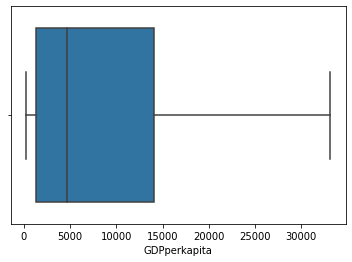

In [60]:
# Outliers Handling on GDPperkapita

Q1_gdp = df_country_ft['GDPperkapita'].quantile(0.25)
Q3_gdp = df_country_ft['GDPperkapita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp
whisker_width = 1.5
lower_whisker = Q1_gdp -(whisker_width*IQR_gdp)
upper_whisker = Q3_gdp + (whisker_width*IQR_gdp)
df_country_ft['GDPperkapita']=np.where(df_country_ft['GDPperkapita']>upper_whisker,upper_whisker,np.where(df_country_ft['GDPperkapita']<lower_whisker,lower_whisker,df_country_ft['GDPperkapita']))

# Boxplot after outliers handling
sns.boxplot(data=df_country_ft['GDPperkapita'], x=df_country_ft['GDPperkapita'])

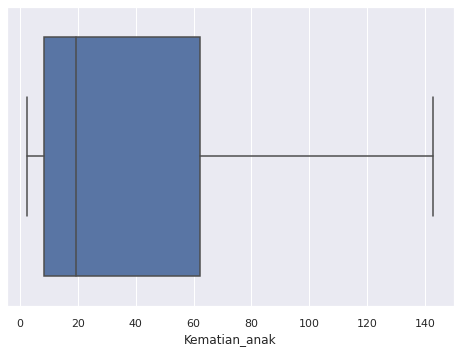

In [117]:
# Outliers Handling on Kematian_anak

Q1_ka = df_country_ft['Kematian_anak'].quantile(0.25)
Q3_ka = df_country_ft['Kematian_anak'].quantile(0.75)
IQR_ka = Q3_ka - Q1_ka
whisker_width = 1.5
lower_whisker = Q1_ka -(whisker_width*IQR_ka)
upper_whisker = Q3_ka + (whisker_width*IQR_ka)
df_country_ft['Kematian_anak']=np.where(df_country_ft['Kematian_anak']>upper_whisker,upper_whisker,np.where(df_country_ft['Kematian_anak']<lower_whisker,lower_whisker,df_country_ft['Kematian_anak']))

# Boxplot after outliers handling
sns.boxplot(data=df_country_ft['Kematian_anak'], x=df_country_ft['Kematian_anak'])



---

**Plotting Histogram after Outliers Handling**

---



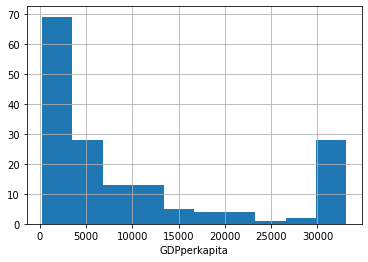

In [62]:
plt.hist(df_country_ft['GDPperkapita'])
plt.xlabel('GDPperkapita')
plt.grid(visible=True)
plt.show()

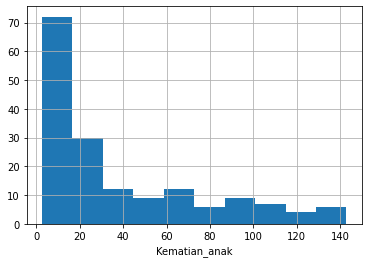

In [61]:
plt.hist(df_country_ft['Kematian_anak'])
plt.xlabel('Kematian_anak')
plt.grid(visible=True)
plt.show()



---

**Univariate Analisys**
---


---





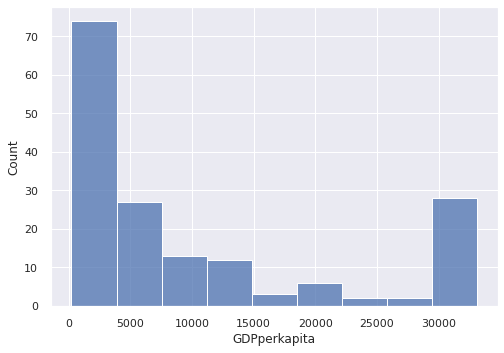

In [123]:
# Histogram for GDPperkapita

sns.histplot(data=df_country_ft, x=df_country_ft['GDPperkapita'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


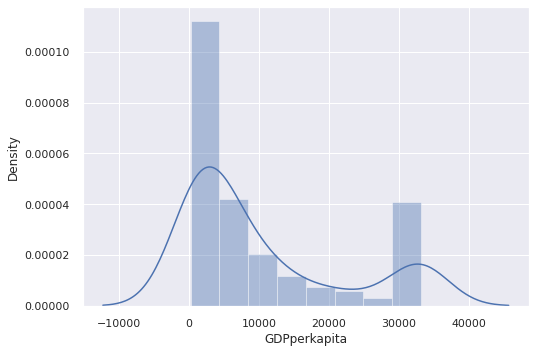

In [125]:
sns.distplot(df_country_ft['GDPperkapita'])

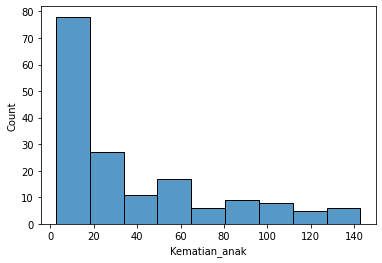

In [63]:
# Histogram for Kematian_anak

sns.histplot(data=df_country_ft, x=df_country_ft['Kematian_anak'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


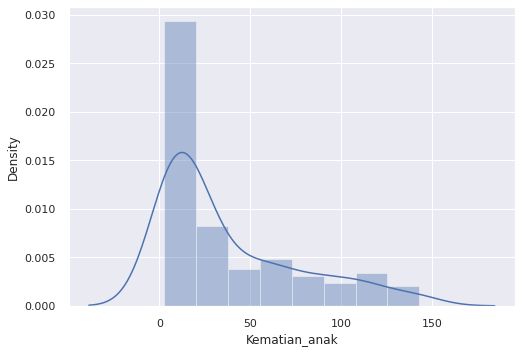

In [126]:
sns.distplot(df_country_ft['Kematian_anak'])



---
**Bivariate Analisys**
---



---



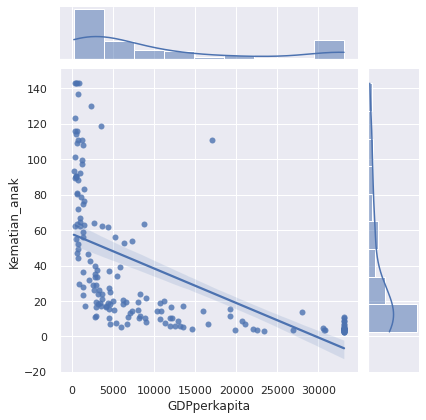

In [127]:
sns.jointplot(data=df_country_ft, x="GDPperkapita", y="Kematian_anak", kind="reg")




---


**Data Scaling**
---



---



In [67]:
sc = StandardScaler()
df_std = sc.fit_transform(df_country_ft)

df_std

array([[-8.46341070e-01,  1.36980194e+00],
       [-5.40827457e-01, -5.50464215e-01],
       [-5.08868159e-01, -2.71295087e-01],
       [-5.89198286e-01,  2.12121043e+00],
       [ 1.59685804e-01, -7.14834823e-01],
       [-4.42951008e-03, -6.05254418e-01],
       [-6.15974995e-01, -5.11328356e-01],
       [ 1.96754555e+00, -8.58332973e-01],
       [ 1.96754555e+00, -8.71378260e-01],
       [-3.89668615e-01,  3.91827284e-02],
       [ 1.52443420e+00, -6.23517819e-01],
       [ 8.93885892e-01, -7.59188797e-01],
       [-8.28633891e-01,  3.05306570e-01],
       [ 4.87916431e-01, -6.13081590e-01],
       [-3.73257084e-01, -8.40069572e-01],
       [ 1.96754555e+00, -8.66160145e-01],
       [-5.19233336e-01, -4.93064955e-01],
       [-8.28633891e-01,  1.91248585e+00],
       [-7.05806535e-01,  1.30499733e-01],
       [-7.23081831e-01,  2.32252967e-01],
       [-4.95911687e-01, -8.03542771e-01],
       [-3.45616610e-01,  3.86187346e-01],
       [ 7.33093228e-02, -4.66974382e-01],
       [ 1.



---
**Deciding Cluster Number**
---



---



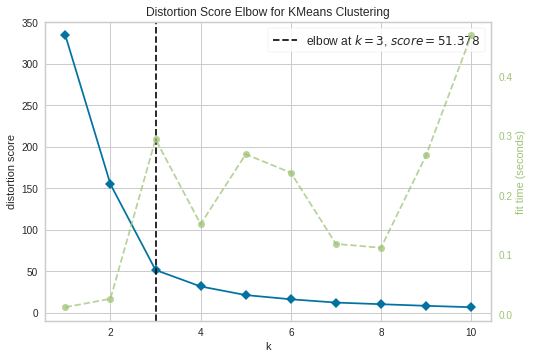

In [82]:
# Elbow Method for K means

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,11), timings= True)
visualizer.fit(df_std)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure



---
**Clustering the Data**
---



---





In [128]:
from pandas.io.formats import style

# Clustering K-Means, k=3

c_kmeans = KMeans(n_clusters=3, random_state=42, max_iter=1000).fit(df_std)
c_label = c_kmeans.labels_

new_df = pd.DataFrame(data = df_std, columns=['GDPperkapita','Kematian_anak'])
new_df['cluster'] = c_label




---

**Plotting The Cluster**

---



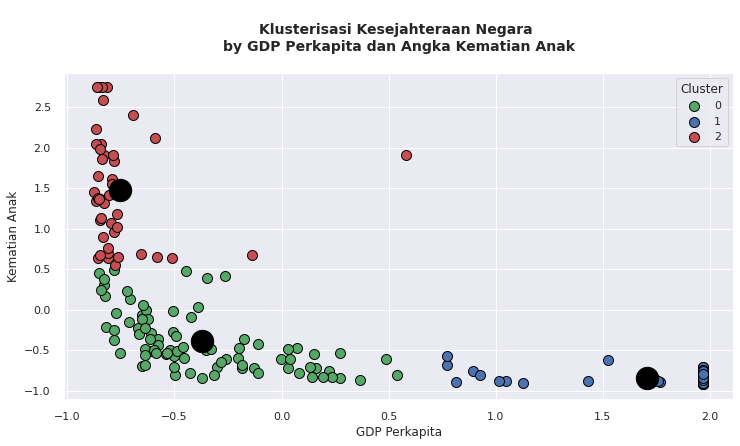

In [129]:
sns.set_theme()


plt.subplots(figsize=(12,6))
plt.scatter(new_df.GDPperkapita[new_df.cluster == 0], new_df['Kematian_anak'][new_df.cluster == 0], c='g',s=100, edgecolor='black', label='0')
plt.scatter(new_df.GDPperkapita[new_df.cluster == 1], new_df['Kematian_anak'][new_df.cluster == 1], c='b',s=100, edgecolor='black', label='1')
plt.scatter(new_df.GDPperkapita[new_df.cluster == 2], new_df['Kematian_anak'][new_df.cluster == 2], c='r',s=100, edgecolor='black', label='2')


center = c_kmeans.cluster_centers_
plt.scatter(center[:,0], center[:,1], c='black', s=500)
plt.title('\nKlusterisasi Kesejahteraan Negara \nby GDP Perkapita dan Angka Kematian Anak\n', fontsize = 14, fontweight='bold')
plt.xlabel('GDP Perkapita')
plt.ylabel('Kematian Anak')
plt.legend(title='Cluster', frameon=True)
plt.show()



---

**Create new DataFrame and add column cluster to DataFrame**

---



---



In [86]:
# Menambahkan kolom cluster pada dataframe

df_result = df_country.copy()
df_result['cluster'] = c_label
df_result

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0




---
**Cluster Visualization with Real Data Scale**
---



---



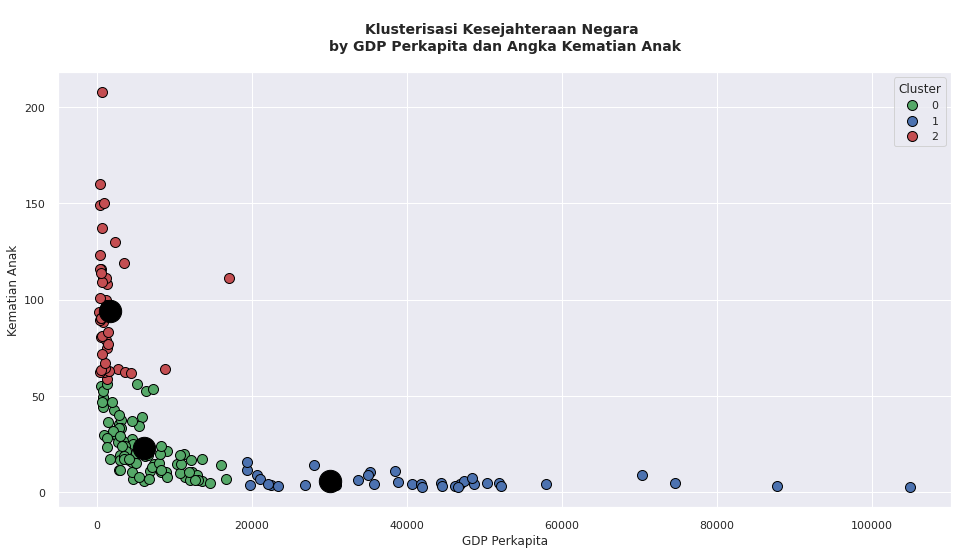

In [130]:
plt.subplots(figsize=(16,8))
plt.scatter(df_result.GDPperkapita[df_result.cluster == 0], df_result['Kematian_anak'][df_result.cluster == 0], c='g',s=100, edgecolor='black', label='0')
plt.scatter(df_result.GDPperkapita[df_result.cluster == 1], df_result['Kematian_anak'][df_result.cluster == 1], c='b',s=100, edgecolor='black', label='1')
plt.scatter(df_result.GDPperkapita[df_result.cluster == 2], df_result['Kematian_anak'][df_result.cluster == 2], c='r',s=100, edgecolor='black', label='2')


center = c_kmeans.cluster_centers_

# get centroids
center = sc.inverse_transform(c_kmeans.cluster_centers_)
cen_x = [i[0] for i in center]
cen_y = [i[1] for i in center]


plt.scatter(x=cen_x, y=cen_y, c='black', s=500)
plt.title('\nKlusterisasi Kesejahteraan Negara \nby GDP Perkapita dan Angka Kematian Anak\n', fontsize = 14, fontweight='bold')
plt.xlabel('GDP Perkapita')
plt.ylabel('Kematian Anak')
plt.legend(title='Cluster', frameon=True)
plt.show()



---
**Recommendation**
---



---





---
**Filter the Country included in Cluster 2**


---



---



In [112]:
x = df_result.loc[df_result['cluster'] == 2]

# Count the number of country included in cluster 2
x[x.columns[0]].count()

44



---

**Display the Country in cluster 2**

---



---



In [113]:
# Menampilkan Negara yg termasuk dalam cluster ke-2

x

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,2
3,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530,2
17,Benin,111.0,23.800,4.10,37.2000,1820,0.885,61.8,5.36,758,2
25,Burkina Faso,116.0,19.200,6.74,29.6000,1430,6.810,57.9,5.87,575,2
26,Burundi,93.6,8.920,11.60,39.2000,764,12.300,57.7,6.26,231,2
28,Cameroon,108.0,22.200,5.13,27.0000,2660,1.910,57.3,5.11,1310,2
31,Central African Republic,149.0,11.800,3.98,26.5000,888,2.010,47.5,5.21,446,2
32,Chad,150.0,36.800,4.53,43.5000,1930,6.390,56.5,6.59,897,2
36,Comoros,88.2,16.500,4.51,51.7000,1410,3.870,65.9,4.75,769,2
37,"Congo, Dem. Rep.",116.0,41.100,7.91,49.6000,609,20.800,57.5,6.54,334,2




---
**Pick the country to receive help**
---



---



In [114]:
# Menampilkan rekomendasi negara yang paling tepat untuk menerima bantuan

x[(x.GDPperkapita < (x['GDPperkapita'].mean())) & (x.Kematian_anak > (x['Kematian_anak'].mean())) ].sort_values(by=['GDPperkapita'],ascending=True).head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,2
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,2
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,2
106,Mozambique,101.0,31.5,5.21,46.2,918,7.64,54.5,5.56,419,2
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,2
